<a href="https://colab.research.google.com/github/sdwaghmare1998/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project_by_Saurabh_Waghmare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(dataFrame):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = dataFrame.memory_usage().sum() / 1024**2
    
    for col in dataFrame.columns:
        col_type = dataFrame[col].dtype
        
        if col_type != object:
            c_min = dataFrame[col].min()
            c_max = dataFrame[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    dataFrame[col] = dataFrame[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    dataFrame[col] = dataFrame[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    dataFrame[col] = dataFrame[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    dataFrame[col] = dataFrame[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    dataFrame[col] = dataFrame[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    dataFrame[col] = dataFrame[col].astype(np.float32)
                else:
                    dataFrame[col] = dataFrame[col].astype(np.float64)
        #else:
            #dataFrame[col] = dataFrame[col].astype('category')

    end_mem = dataFrame.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return dataFrame

In [5]:
# loading csv File
file_path = '/content/drive/MyDrive/NYC Taxi Trip Duration Prediction/NYC Taxi Data.csv'

dataFrame = pd.read_csv(file_path)
dataFrame = reduce_mem_usage(dataFrame)

Memory usage of dataframe is 122.41 MB --> 75.12 MB (Decreased by 38.6%)


In [6]:
dataFrame.shape

(1458644, 11)

In [7]:
dataFrame.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
dataFrame.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [9]:
dataFrame.duplicated().sum()

0

In [10]:
dataFrame.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

So, our dataset looks like a clean one with no na values and 1458644 trip records, column `trip_duration` is our target variable. Lets explore the datatype and distribution a more...

In [11]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int8   
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int8   
 5   pickup_longitude    1458644 non-null  float32
 6   pickup_latitude     1458644 non-null  float32
 7   dropoff_longitude   1458644 non-null  float32
 8   dropoff_latitude    1458644 non-null  float32
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int32  
dtypes: float32(4), int32(1), int8(2), object(4)
memory usage: 75.1+ MB


Observation till now,

1.   `id` and `vendor_id` should not be a part of our analysis
2.   `pickup_datetime` and `dropoff_datetime` should be converted to datetime 
3.    `store_and_fwd_flag` is categorical



In [12]:
dataFrame.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97350,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


We can notice that, max trip duration is 3526282 or ~979 hrs, we have to look into this later. Passenger count  normally vary between 2 to 9. The locations are a chunk, which means there is obviously some long trip, but most looks like within short distance between close neighbourhoods

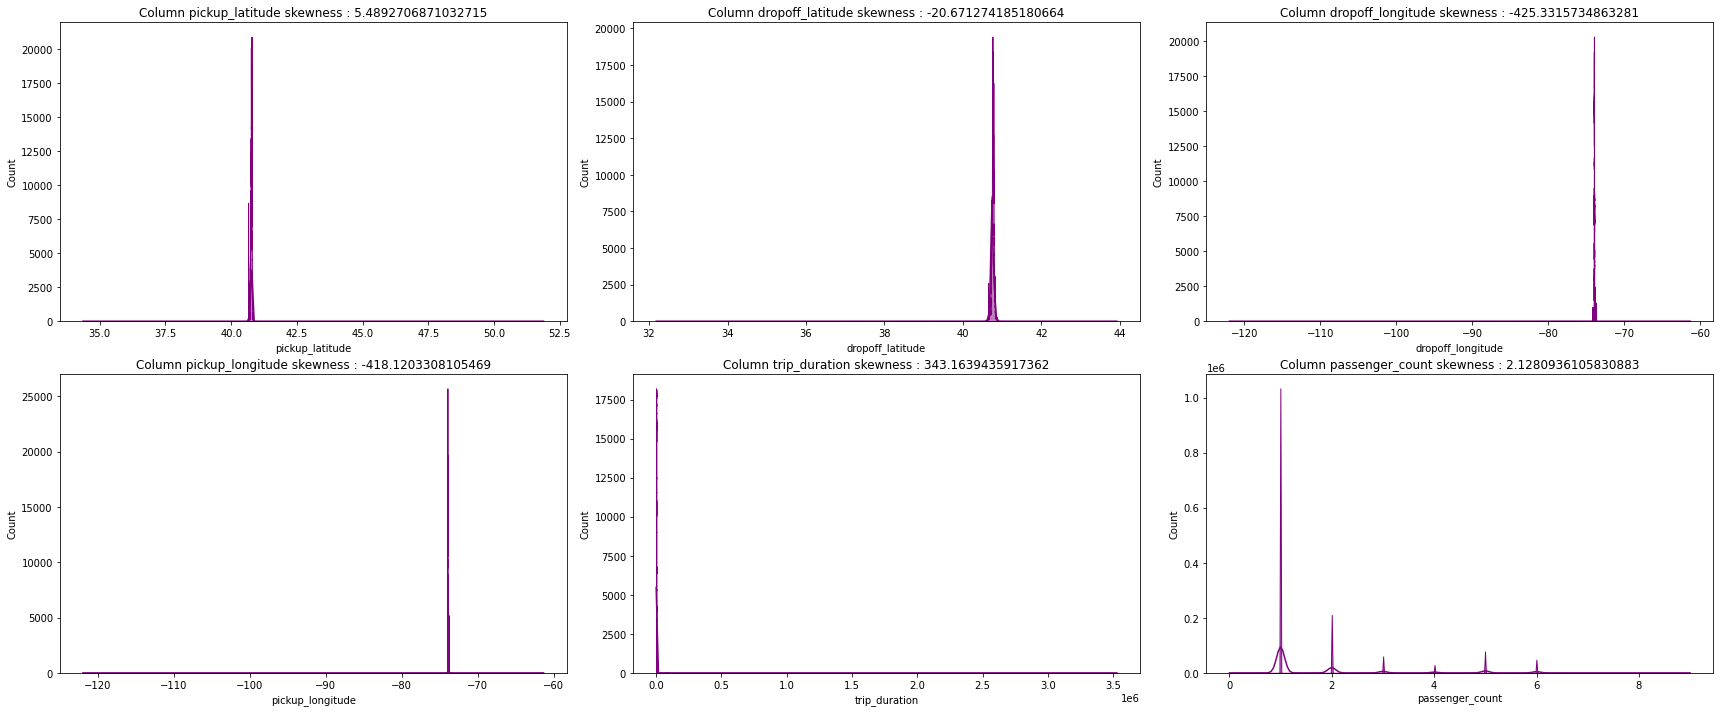

In [13]:
column_after_excluding = set(dataFrame.columns) - {'vendor_id'}
dist_column_list = dataFrame[column_after_excluding].describe().columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten()
for col, ax in zip(dist_column_list, axes):
    sns.histplot(x=col, data=dataFrame, color='purple',ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {dataFrame[col].skew()}')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

Hmm, so it looks like some of records have very long trip duration, having a such long trip on histogram, it has taken over all the other short trips. So, we should plot the same on log scale rather than normal scale (right skewed data should be transformed into log scale). We will do tha univariate analysis on target later

Now, we will plot lat long but as we've seen previously data is concentrated wiithin a small region in terms of lat long. To plot efficiently, we've to choose a range.

In [14]:
print(f"The avg range for 1st and 3rd quantile of latitude in case of both pickup and dropoff is \
from {np.mean([dataFrame['pickup_latitude'].quantile(0.25), dataFrame['dropoff_latitude'].quantile(0.25)])} \
to {np.mean([dataFrame['pickup_latitude'].quantile(0.75), dataFrame['dropoff_latitude'].quantile(0.75)])}")

print(f"The avg range for 1st and 3rd quantile of longitude in case of both pickup and dropoff is \
from {np.mean([dataFrame['pickup_longitude'].quantile(0.25), dataFrame['dropoff_longitude'].quantile(0.25)])} \
to {np.mean([dataFrame['pickup_longitude'].quantile(0.75), dataFrame['dropoff_longitude'].quantile(0.75)])}")

The avg range for 1st and 3rd quantile of latitude in case of both pickup and dropoff is from 40.7366156578064 to 40.76908493041992
The avg range for 1st and 3rd quantile of longitude in case of both pickup and dropoff is from -73.99159622192383 to -73.96517181396484


So we'll be considering ±0.10 to both limits for plotting

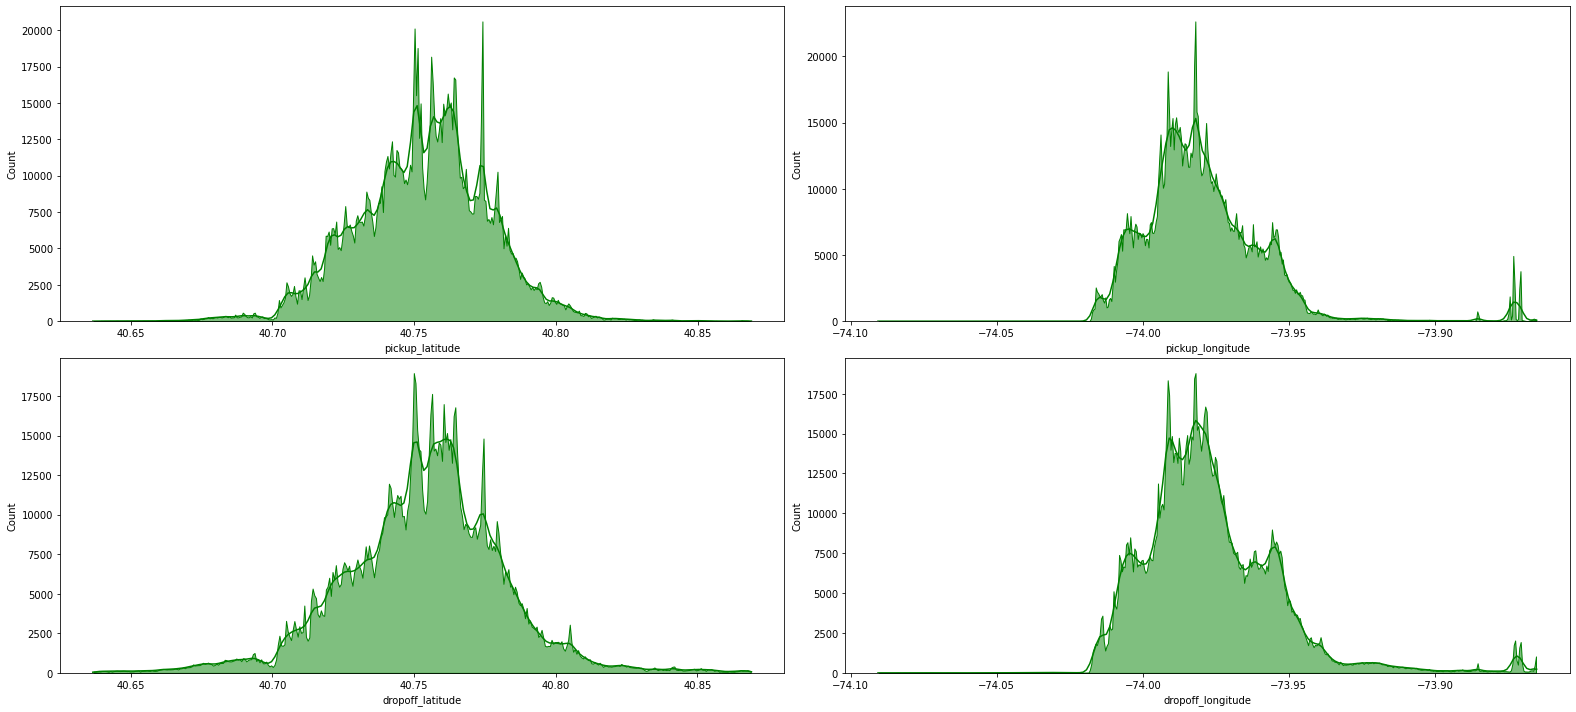

In [15]:
lat_limits = [40.7366156578064-0.10, 40.76908493041992+0.10]
long_limits = [-73.99159622192383-0.10, -73.96517181396484+0.10]

temp_dataFrame = dataFrame.copy()
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.pickup_latitude > lat_limits[0]) & (temp_dataFrame.pickup_latitude < lat_limits[1])]
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.dropoff_latitude > lat_limits[0]) & (temp_dataFrame.dropoff_latitude < lat_limits[1])]
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.dropoff_longitude > long_limits[0]) & (temp_dataFrame.dropoff_longitude < long_limits[1])]
temp_dataFrame = temp_dataFrame.loc[(temp_dataFrame.pickup_longitude > long_limits[0]) & (temp_dataFrame.pickup_longitude < long_limits[1])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 10))
axes = axes.flatten()

for col, ax in zip(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axes):
    sns.histplot(x=col, data=temp_dataFrame,color='green' ,ax=ax, kde=True, element='poly')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

We can see that most of the trips are getting concentrated between these lat-long only.

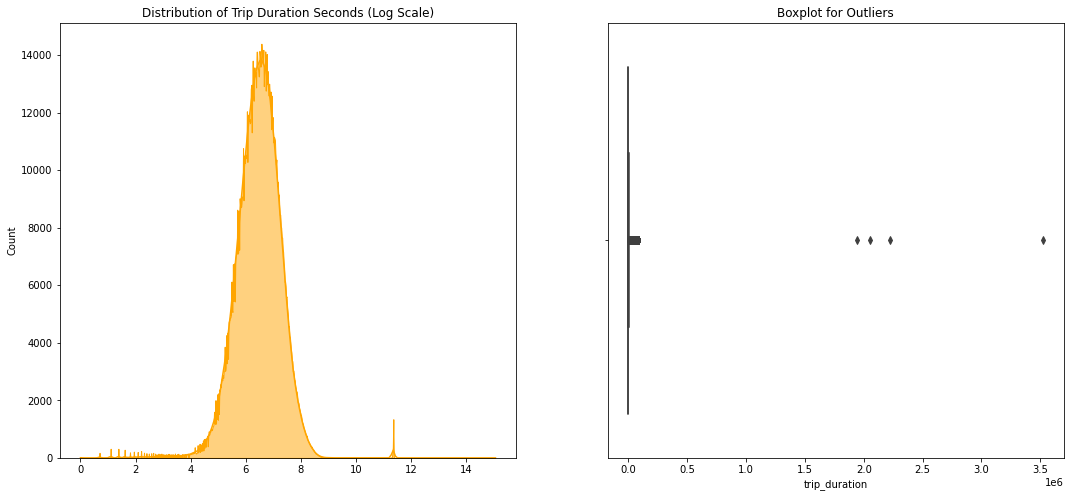

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
axes = axes.flatten()

sns.histplot(x=np.log(dataFrame['trip_duration'].values), ax=axes[0],color='orange',kde=True, element='poly')
axes[0].set_title('Distribution of Trip Duration Seconds (Log Scale)')

sns.boxplot(x='trip_duration', data=dataFrame, ax=axes[1])
axes[1].set_title('Boxplot for Outliers')

plt.show()

So, it looks like a normal distribution on log scale with most of the trips between ~54 sec (exp 4) and 82 mins (exp 8). In previous distribution we've talked about long trips. How much long ? We know the max trip_duration is 3526282.00 seconds or ~979 hours !!!! Is that even possible for an intracity taxi trip ?? There is clearly 4 outliers, we'll review those but first let us calculate trip_distance and add some other later useful features

In [17]:
from geopy.distance import great_circle

dataFrame['distance_km'] = dataFrame.apply(lambda x: great_circle([x.pickup_latitude, x.pickup_longitude], [x.dropoff_latitude, x.dropoff_longitude]).km, axis=1)

In [18]:
dataFrame['pickup_datetime'] = pd.to_datetime(dataFrame['pickup_datetime'], format = '%Y-%m-%d %H:%M:%S')
dataFrame['dropoff_datetime'] = pd.to_datetime(dataFrame['dropoff_datetime'], format = '%Y-%m-%d %H:%M:%S')

In [19]:
dataFrame['pickup_hour'] = dataFrame['pickup_datetime'].dt.hour
dataFrame['pickup_weekday'] = dataFrame['pickup_datetime'].dt.weekday
dataFrame['pickup_day'] = dataFrame['pickup_datetime'].dt.day
dataFrame['pickup_month'] = dataFrame['pickup_datetime'].dt.month
dataFrame['pickup_year'] = dataFrame['pickup_datetime'].dt.year
dataFrame['pickup_date'] = dataFrame['pickup_datetime'].dt.date

dataFrame['dropoff_hour'] = dataFrame['dropoff_datetime'].dt.hour
dataFrame['dropoff_weekday'] = dataFrame['dropoff_datetime'].dt.weekday
dataFrame['dropoff_day'] = dataFrame['dropoff_datetime'].dt.day
dataFrame['dropoff_month'] = dataFrame['dropoff_datetime'].dt.month
dataFrame['dropoff_year'] = dataFrame['dropoff_datetime'].dt.year
dataFrame['dropoff_date'] = dataFrame['dropoff_datetime'].dt.date

In [20]:
def time_of_day(x):
    # to calculate what time of it is now
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

dataFrame['pickup_time_of_day'] = dataFrame['pickup_hour'].apply(time_of_day)
dataFrame['dropoff_time_of_day'] = dataFrame['dropoff_hour'].apply(time_of_day)

In [21]:
dataFrame['trip_duration_hour'] = dataFrame['trip_duration'].apply(lambda x: x/3600)

So now, we've created some columns like,

1.   distance_km - total distance travelled using km
2.   pickup/dropoff_hour - range 0 to 23 representing hour in 24-hr format
3.   pickup/dropoff_weekday - range 0 to 6 representing weekday where 0 -> Monday, 6 -> Sunday
4.   pickup/dropoff_day - representing day no of month
5.   pickup/dropoff_month - representing month no of year
6.   pickup/dropoff_year - representing year of travel
7.   pickup/dropoff_date - representing date of travel (yyyy-mm-dd)
8.   pickup/dropoff_time_of_day - categorical column where with 4 unique value, Morning, Afternoon, evening, Late Night
9.   trip_duration_hour - duration of trip in hour

\

